# JPMorgan: Quantitative Research Job Simulation

## Task 1: Forecast in Commodities Markets

### Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from prophet import Prophet


### File reading and global overview

In [37]:
# File reading and dates to column
nat_gas = pd.read_csv("Nat_Gas.csv", index_col = 0)
print(nat_gas.head(), nat_gas.tail())
print(nat_gas.describe())

          Prices
Dates           
10/31/20    10.1
11/30/20    10.3
12/31/20    11.0
1/31/21     10.9
2/28/21     10.9          Prices
Dates          
5/31/24    11.4
6/30/24    11.5
7/31/24    11.6
8/31/24    11.5
9/30/24    11.8
          Prices
count  48.000000
mean   11.207083
std     0.757897
min     9.840000
25%    10.650000
50%    11.300000
75%    11.625000
max    12.800000


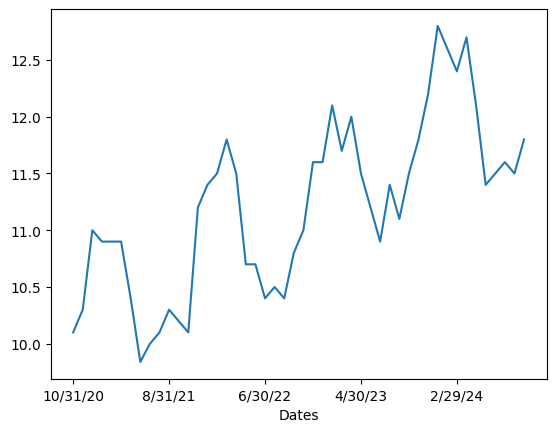

In [38]:
fig1 = nat_gas['Prices'].plot()
#rising prices from october til march

Comment : just from the prices alone we can notice a trend of rising prices from october til march

In [39]:
#Calculate Simple Moving Averages 
nat_gas['SMA_3']=nat_gas.Prices.rolling(3).mean()
nat_gas['SMA_6']=nat_gas.Prices.rolling(6).mean()
nat_gas['SMA_12']=nat_gas.Prices.rolling(12).mean()

nat_gas

,Prices,SMA_3,SMA_6,SMA_12
Dates,,,,
10/31/20,10.10,NaN,NaN,NaN
11/30/20,10.30,NaN,NaN,NaN
12/31/20,11.00,10.466667,NaN,NaN
1/31/21,10.90,10.733333,NaN,NaN
2/28/21,10.90,10.933333,NaN,NaN
3/31/21,10.90,10.900000,10.683333,NaN
4/30/21,10.40,10.733333,10.733333,NaN
5/31/21,9.84,10.380000,10.656667,NaN
6/30/21,10.00,10.080000,10.490000,NaN


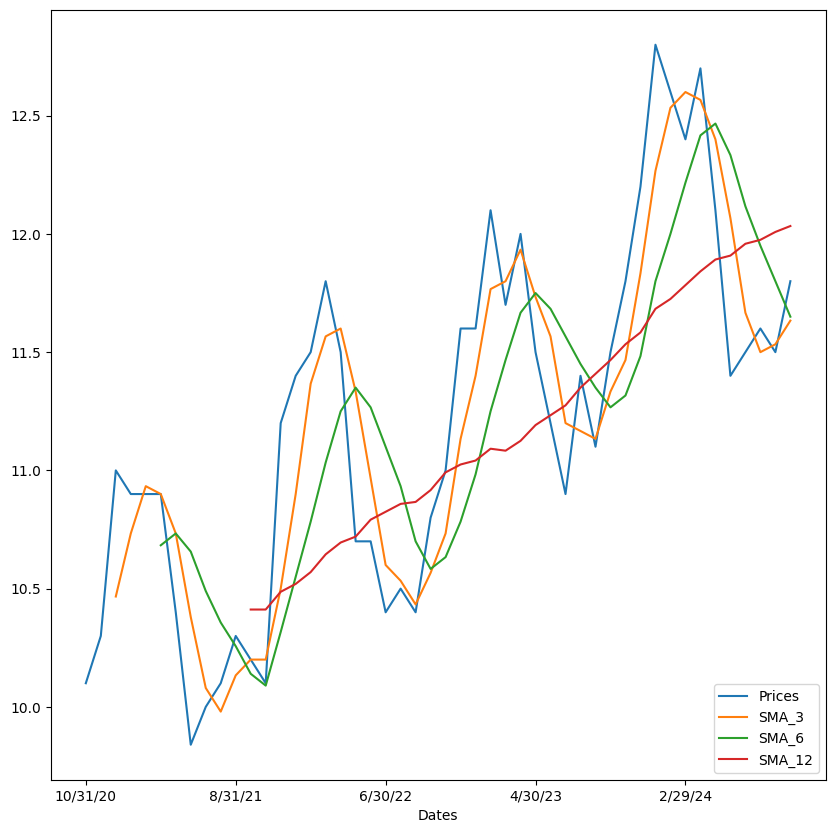

In [40]:
nat_gas.loc[:,['Prices','SMA_3','SMA_6','SMA_12']].plot(figsize =(10,10))
plt.legend(loc = 'lower right')
plt.show()

In [41]:
time = np.arange(1,len(nat_gas)+1, 1)
nat_gas['time'] = time
data=nat_gas[['time','Prices']]
data.head()

,time,Prices
Dates,,
10/31/20,1,10.1
11/30/20,2,10.3
12/31/20,3,11.0
1/31/21,4,10.9
2/28/21,5,10.9


In [42]:
reg = np.polyfit(data['time'],data['Prices'],deg =1)
reg

array([ 0.03901324, 10.25125887])

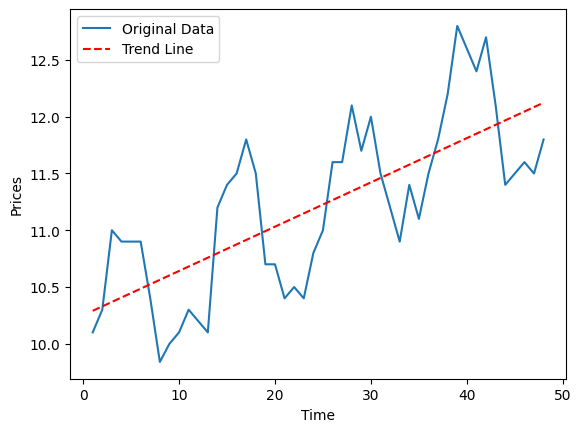

In [43]:
std = data['Prices'].std()

trend = np.polyval(reg, data['time'])

plt.figure()
plt.plot(data['time'], data['Prices'], label='Original Data')
plt.plot(data['time'].values, trend, 'r--', label = 'Trend Line')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show()


Comment : We can clearly adapt the following trend by using rolling moving average or by a linear regression from time.

### Time-Series Study

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

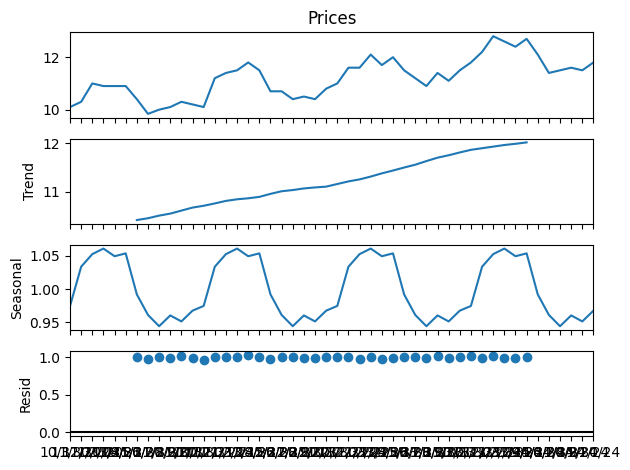

In [45]:
result = seasonal_decompose(data['Prices'], model = 'multiplicative', period = 12)
result.plot()
plt.show()

In [46]:
#Forecasting with Prophet

df = pd.read_csv('Nat_Gas.csv')
df = df[['Dates','Prices']]
df = df.rename(columns = {'Dates' : 'ds', 'Prices' : 'y'})

last_12 = df[len(df)- 12 :]
last_12


,ds,y
36,10/31/23,11.8
37,11/30/23,12.2
38,12/31/23,12.8
39,1/31/24,12.6
40,2/29/24,12.4
41,3/31/24,12.7
42,4/30/24,12.1
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6


In [47]:
df = df[:-12]
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [48]:
model = Prophet(seasonality_mode = 'multiplicative')
model.fit(df)
                
future = model.make_future_dataframe(periods = 24, freq = 'ME')

forecast = model.predict(future)

/Users/hugo/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1133: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/Users/hugo/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:287: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

22:30:52 - cmdstanpy - INFO - Chain [1] start processing


22:30:53 - cmdstanpy - INFO - Chain [1] done processing


### Interactive plot once we get rid of multiplicative seasonality + trend = forecast of future prices

In [49]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [50]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
55,2025-05-31,13.332221,12.430588,12.784453,13.221251,13.446924,-0.053979,-0.053979,-0.053979,-0.053979,-0.053979,-0.053979,0.0,0.0,0.0,12.612555
56,2025-06-30,13.403326,12.550972,12.911837,13.282971,13.525580,-0.049483,-0.049483,-0.049483,-0.049483,-0.049483,-0.049483,0.0,0.0,0.0,12.740089
57,2025-07-31,13.476800,12.609330,13.003120,13.348983,13.609185,-0.049825,-0.049825,-0.049825,-0.049825,-0.049825,-0.049825,0.0,0.0,0.0,12.805318
58,2025-08-31,13.550275,12.844954,13.244782,13.415160,13.691341,-0.037068,-0.037068,-0.037068,-0.037068,-0.037068,-0.037068,0.0,0.0,0.0,13.047988
59,2025-09-30,13.621379,12.852204,13.243618,13.477731,13.770033,-0.041971,-0.041971,-0.041971,-0.041971,-0.041971,-0.041971,0.0,0.0,0.0,13.049675


In [51]:
#Show the models prediction for 8/31/24
forecast[forecast.ds == '8/31/24']['yhat']

46    12.409223
Name: yhat, dtype: float64

In [52]:
#Show the actual price for 8/31/24
last_12[last_12.ds == '8/31/24']['y']


46    11.5
Name: y, dtype: float64

In [53]:
def prediction(userdate):
    actual = last_12[last_12.ds == userdate]['y']
    T = forecast[forecast.ds == userdate].index.values + 12
    predict_1y = forecast.iloc[T]['yhat']
    return actual, predict_1y

print(prediction('8/31/24'))


(46    11.5
Name: y, dtype: float64, 58    13.047988
Name: yhat, dtype: float64)
